# Plot example profile

This code plots the example profile

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import ndimage
import matplotlib.path as mplPath
import math

In [2]:
x = np.array([-0.2, -0.3, -1, -2, -1,  -0.3, -0.2])
y = np.array([-0.3, -0.3, -0.8,  0,         0.8,  0.3, 0.3])

x = np.concatenate((x, np.flip(x*-1)))
y = np.concatenate((y, y*-1))
x = np.concatenate((x, np.asarray([-0.2, -0.3])))
y = np.concatenate((y, np.asarray([-0.3, -0.3])))

In [3]:
def __interpolate(x, y):
    tck, u = interpolate.splprep([x, y], s=0)
    unew = np.arange(0, 1.0, 0.001)
    out = interpolate.splev(unew, tck)
    xo = out[0]
    yo = out[1]
    return xo, yo

def get_inside(x_tumor, y_tumor):
    x_tumor_stack = np.concatenate((x_tumor, -x_tumor))
    y_tumor_stack = np.concatenate((y_tumor, y_tumor))
    print(x_tumor_stack.shape, x_tumor.shape)
    poly_path = mplPath.Path(np.vstack((x_tumor_stack, y_tumor_stack)).T)
    point = np.asarray([0, 0])
    print(point, " is in polygon: ", poly_path.contains_point(point))
    x = np.arange(-3, 3, 0.05)
    y = np.arange(-3, 3, 0.05)
    xx, yy = np.meshgrid(x, y, sparse=True)
    z = np.zeros((xx.shape[1], yy.shape[0]))
    print(z.shape, xx.shape, yy.shape, x.shape, y.shape)
    for i in range(xx.shape[1]):
        for j in range(yy.shape[0]):
            z[i, j] = poly_path.contains_point((xx[0,j], yy[i,0]))
    z = ndimage.binary_dilation(z, structure=np.ones((3, 3)))
    z = z.astype(np.bool_)
    return x, y, z

def get_normals(xo, yo, length=.2):
    xn = []
    yn = []
    for idx in range(len(xo)-1):
        x0, y0, xa, ya = xo[idx], yo[idx], xo[idx+1], yo[idx+1]
        dx, dy = xa-x0, ya-y0
        norm = math.hypot(dx, dy) * 1/length
        dx /= norm
        dy /= norm
        
        xn.append(x0-dy)
        yn.append(y0+dx)
    return xn, yn


In [4]:
x_tumor, y_tumor = __interpolate(x, y)
x_margin, y_margin, = get_normals(x_tumor, y_tumor, length=0.3)
x_margin = np.asarray(x_margin)
y_margin = np.asarray(y_margin)

In [5]:
x = np.array([0, -0.05, -0.1, -0.8, -2, -2.5, -2, -0.8,  -0.1, -0.05,  0])
y = np.array([0,     0,    0,    1,  1,    0,  1,    1,     0,     0,  0])

x_power, y_power = __interpolate(x, y)
y_power = np.concatenate((y_power, y_power))
x_power = np.concatenate((x_power, -x_power))

(1998,) (999,)
[0 0]  is in polygon:  False
(120, 120) (1, 120) (120, 1) (120,) (120,)


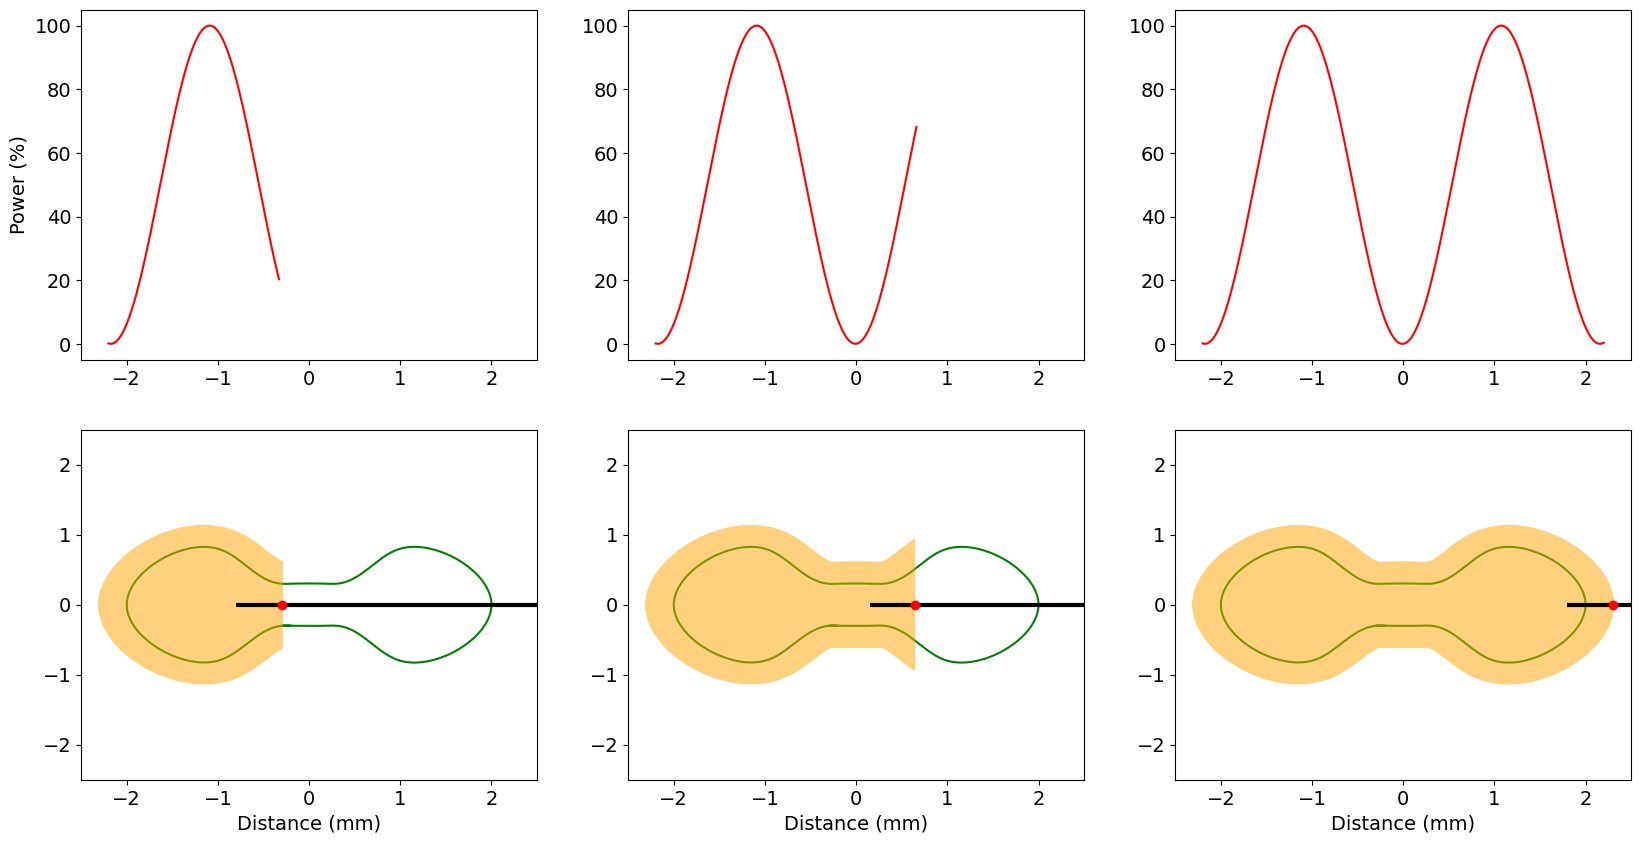

In [19]:
plt.rcParams.update({'font.size': 14})

power_offset = 1.5

x_power = np.linspace(-2.2, 2.2, len(x_margin))
y_power = (np.sin((x_power-2.7)*2.9) + 1) * 50

x_idx = np.argsort(x_margin)
y_margin = y_margin[x_idx]
x_margin = x_margin[x_idx]


fig = plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
range_ = list(range(425))
plt.plot(x_power[range_], y_power[range_], color='red');
plt.xlim(-2.5, 2.5)
plt.ylabel("Power (%)")

plt.subplot(2, 3, 2)
range_ = list(range(650))
plt.plot(x_power[range_], y_power[range_], color='red');
plt.xlim(-2.5, 2.5)

plt.subplot(2, 3, 3)
plt.plot(x_power, y_power, color='red');
plt.xlim(-2.5, 2.5)


plt.subplot(2, 3, 4)
range_ = list(range(400))
plt.plot(x_tumor, y_tumor, color='green')
plt.plot(x_margin[range_], y_margin[range_], color='orange', alpha=0.5);
plt.hlines(xmin=-0.8, xmax=2.5, y=0, linewidth=3, colors='black');
plt.plot(-0.3, 0, 'ro');
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xlabel("Distance (mm)")

plt.subplot(2, 3, 5)
range_ = list(range(700))
plt.plot(x_tumor, y_tumor, color='green')
# plt.plot(-x_tumor, y_tumor, color='green')
plt.plot(x_margin[range_], y_margin[range_], color='orange', alpha=0.5);
plt.hlines(xmin=0.15, xmax=2.5, y=0, linewidth=3, colors='black');
plt.plot(0.65, 0, 'ro');
# plt.plot(-x_margin_r[range_], y_margin_r[range_], color='orange', alpha=0.5);
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xlabel("Distance (mm)")


plt.subplot(2, 3, 6)
range_= list(range(990))
plt.plot(x_tumor, y_tumor, color='green')
plt.plot(x_margin[range_], y_margin[range_], color='orange', alpha=0.5);
plt.hlines(xmin=1.8, xmax=2.5, y=0, linewidth=3, colors='black');
plt.plot(2.3, 0, 'ro');
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xlabel("Distance (mm)")

x, y, z = get_inside(x_margin, y_margin)
plt.savefig('out/profiles.png')
plt.savefig('out/profiles.pdf')
plt.savefig('out/profiles.svg')

Text(0.5, 0, 'Distance (mm)')

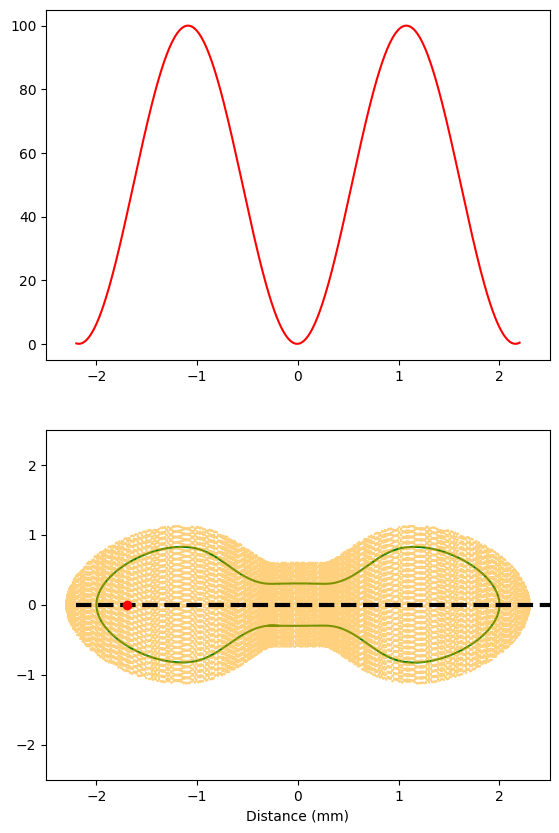

In [7]:
plt.figure(figsize=(6.5, 10))
plt.subplot(2, 1, 1)
plt.plot(x_power, y_power, color='red');
plt.xlim(-2.5, 2.5)

plt.subplot(2, 1, 2)
range_ = list(range(400))
plt.plot(x_tumor, y_tumor, color='green')
plt.plot(x_margin, y_margin, color='orange', alpha=0.5, linestyle='dotted');
plt.hlines(xmin=-2.2, xmax=2.5, y=0, linewidth=3, color='black', linestyle='dashed');
plt.plot(-1.7, 0, 'ro');
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xlabel("Distance (mm)")

# Margin

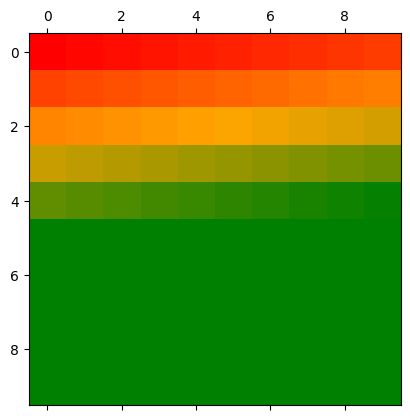

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np

some_matrix = np.linspace(0, 99, 100).reshape(10, 10)

cmap = clr.LinearSegmentedColormap.from_list('my map', ['red', 'orange', 'green', 'green', 'green'], N=100)

plt.matshow(some_matrix, cmap=cmap)

plt.show()

In [9]:
x = np.array([-0.2, -0.3, -1, -2.3, -1,  -0.3, -0.2])
y = np.array([-0.6, -0.7, -1.2,  0,         1.2,  0.7, 0.6])

x = np.concatenate((x, np.flip(x*-1)))
y = np.concatenate((y, y*-1))
x = np.concatenate((x, np.asarray([-0.2, -0.3])))
y = np.concatenate((y, np.asarray([-0.6, -0.7])))

x[x>2] = 2
y[x>0.7] = [x_ -0.15 if x_>0 else x_ +0.15 for x_ in y[x>0.7] ]

x_margin_2, y_margin_2 = __interpolate(x, y)

(-2.5, 2.5)

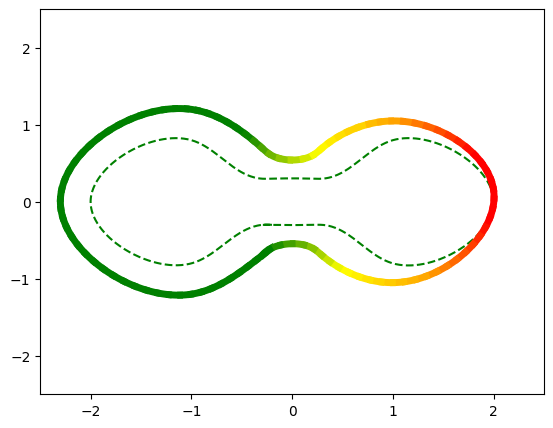

In [10]:
cmap = clr.LinearSegmentedColormap.from_list('my map', ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'yellow', 'orange', 'red', 'red', 'orange', 'yellow', 'green'], N=100)
colors = cmap(np.linspace(0,1,101))

fig = plt.figure(figsize=(6.5, 5))
plt.plot(x_tumor, y_tumor, color='green', linestyle='dashed')
for i in range(1, 101):
    plt.plot(x_margin_2[(i-1)*10:(i*10)], y_margin_2[(i-1)*10:(i*10)], 
             color=colors[i-1], linewidth=5)
    
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)